In [23]:
from google_images_download import google_images_download

In [24]:
response = google_images_download.googleimagesdownload()

In [46]:
# '1040 TAX Form',
#'W9',
#'W2',
#'1040EZ'
search_queries= [ 
] 

In [47]:
def downloadimages(query): 
    # keywords is the search query 
    # format is the image file format 
    # limit is the number of images to be downloaded 
    # print urs is to print the image file url 
    # size is the image size which can 
    # be specified manually ("large, medium, icon") 
    # aspect ratio denotes the height width ratio 
    # of images to download. ("tall, square, wide, panoramic") 
    arguments = {"keywords": query, 
                 "format": "jpg", 
                 "limit":800, 
                 "print_urls":True, 
                 "size": "medium", 
                 "aspect_ratio": "tall","chromedriver":"E:\\chromedriver\\chromedriver.exe"} 
    try: 
        response.download(arguments) 
      
    # Handling File NotFound Error     
    except FileNotFoundError:  
        arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":10, 
                     "print_urls":True,  
                     "size": "medium"} 
                       
        # Providing arguments for the searched query 
        try: 
            # Downloading the photos based 
            # on the given arguments 
            response.download(arguments)  
        except: 
            pass
  

In [48]:
for query in search_queries: 
    downloadimages(query)  
    print()


Item no.: 1 --> Item name = 1040 TAX Form
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Image URL: http://www.your-tax-help-expert.com/images/form-1040.jpg
Completed Image ====> 1.form-1040.jpg
Image URL: https://bookstore.gpo.gov/sites/default/files/styles/product_page_image/public/covers/f1040.jpg?itok=oJrKe-Ax
Completed Image ====> 2.f1040.jpg
Image URL: https://image.slidesharecdn.com/1273089/95/form-1040individual-income-tax-return-1-728.jpg?cb=1239367375
Completed Image ====> 3.form-1040individual-income-tax-return-1-728.jpg
Image URL: https://saylordotorg.github.io/text_personal-finance/section_10/d2592e883e5d1f2f7c20710f8f5cc175.jpg
Completed Image ====> 4.d2592e883e5d1f2f7c20710f8f5cc175.jpg
Image URL: https://i2.wp.com/viralcovert.com/wp-content/uploads/2019/01/1040-tax-form-2013-printable.jpg
Completed Image ====> 5.1040-tax-form-2013-printable.jpg
Image URL: https://static01.nyt.com/images/2018/06/26/bus

In [49]:
from pdf2image import convert_from_path, convert_from_bytes

In [50]:
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)

In [51]:
import tempfile

In [52]:
images = convert_from_path('f1040.pdf')

In [56]:
images_from_path = convert_from_path('f1040.pdf', output_folder='1040',fmt='jpg',size=(400, None))

In [57]:
delete images

SyntaxError: invalid syntax (<ipython-input-57-09ed82121b53>, line 1)

In [60]:
images_from_path[1].close()

In [62]:
images_from_path = convert_from_path('f1040pr.pdf', output_folder='1040PR',fmt='jpg',size=(600, None))
for img in images_from_path:
    img.close()

In [71]:
# augumentation

# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
#from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import np_utils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from PIL import Image

In [66]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa

In [83]:
seq = iaa.Sequential([
    iaa.Fliplr(0.1), # horizontal flips
    iaa.Crop(percent=(0, 0.05)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.2))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.contrast.LinearContrast((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25)
   #     shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

In [84]:
jpgfile = Image.open("1040PR/f4ffda02-f614-4dde-b6e1-0636a9eb5906-1.jpg")
img= np.asarray(jpgfile)

In [85]:
print(type(jpgfile))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [90]:
for i in range(10):
    images_aug=seq(images=[img])
    img2 = Image.fromarray(images_aug[0], 'RGB')
    img2.show()

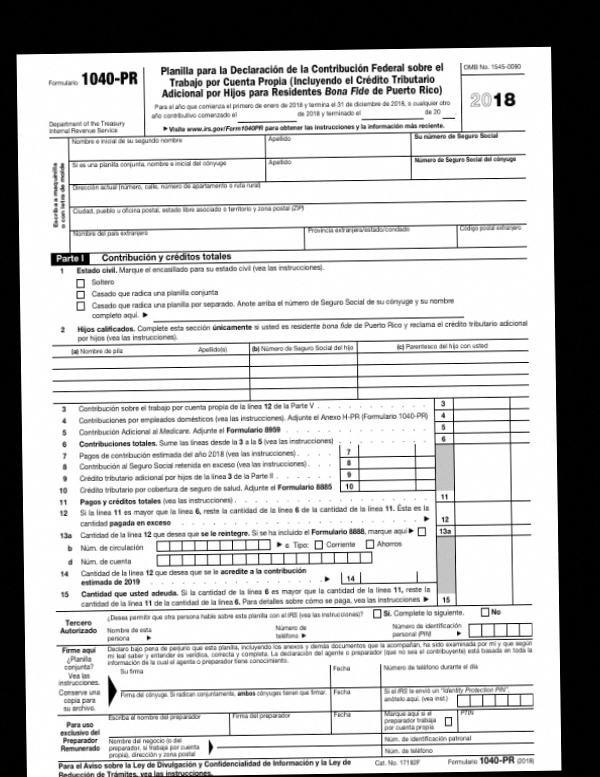

In [87]:
img2 = Image.fromarray(images_aug[0], 'RGB')
img2